# Problem

Predict whether or not the patient has diabetes.

# About the dataset

### Input Variables:

preg: Number of times pregnant

plas: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

pres: Diastolic blood pressure (mm Hg)

skin: Triceps skin fold thickness (mm)

test: 2-Hour serum insulin (mu U/ml)

mass: Body mass index (weight in kg/(height in m)^2)

pedi: Diabetes pedigree function

age: Age (years)

### Outcome/Target Variable

0: no diabetes

1: diabetic

# Importing relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing dataset

In [2]:
data = pd.read_csv('.../pima-indians-diabetes.csv', \
                   names = ['preg','plas','pres','skin','test','mass','pedi','age','class'])
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# About the dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
preg     768 non-null int64
plas     768 non-null int64
pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.describe(include='all')

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Note

Some of the variables (like plas, pres, etc.) cannot have value 0. 0 value might have been inserted to replace missing values. They will be replaced by 'NaN'.

In [5]:
for i in range(len(data)):
    if data.loc[i,'plas'] == 0:
        data.loc[i,'plas'] = np.nan
    if data.loc[i,'pres'] == 0:
        data.loc[i,'pres'] = np.nan
    if data.loc[i,'skin'] == 0:
        data.loc[i,'skin'] = np.nan
    if data.loc[i,'test'] == 0:
        data.loc[i,'test'] = np.nan
    if data.loc[i,'mass'] == 0:
        data.loc[i,'mass'] = np.nan

# Data preprocessing

### Checking for missing values

In [6]:
data.isnull().sum()

preg       0
plas       5
pres      35
skin     227
test     374
mass      11
pedi       0
age        0
class      0
dtype: int64

### Filling missing values

In [7]:
cols = ['plas','pres','skin','test','mass']
for item in cols:
    data[item] = data[item].fillna(data[item].mean())

In [8]:
data.isnull().sum()

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

### Analyzing numerical attributes

In [9]:
data.drop('class', axis=1).describe()

,preg,plas,pres,skin,test,mass,pedi,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [10]:
data.groupby('class').mean()

,preg,plas,pres,skin,test,mass,pedi,age
class,,,,,,,,
0,3.298000,110.710121,70.935397,27.768651,142.210761,30.888434,0.429734,31.190000
1,4.865672,142.165573,75.147324,31.736944,180.431548,35.384757,0.550500,37.067164


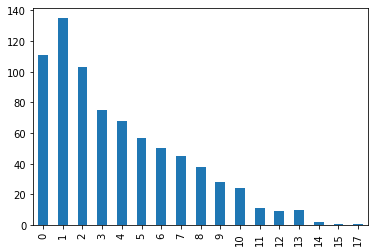

In [11]:
data.preg.value_counts().sort_index().plot.bar()

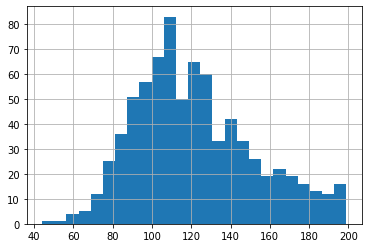

In [12]:
data.plas.hist(bins=25)

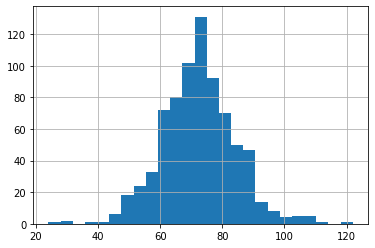

In [13]:
data.pres.hist(bins=25)

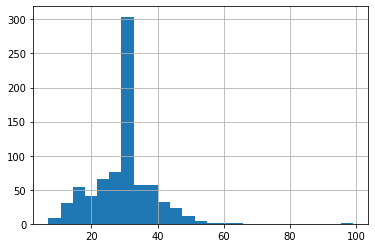

In [14]:
data.skin.hist(bins=25)

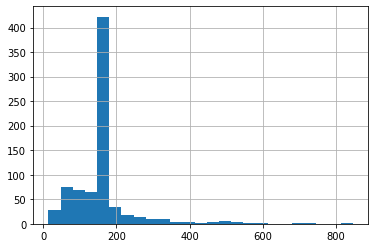

In [15]:
data.test.hist(bins=25)

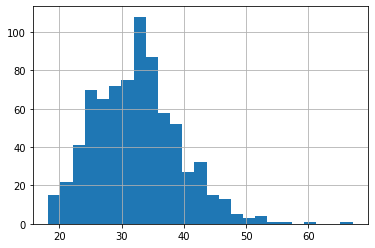

In [16]:
data.mass.hist(bins=25)

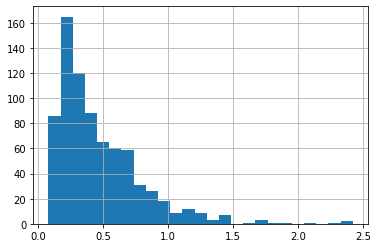

In [17]:
data.pedi.hist(bins=25)

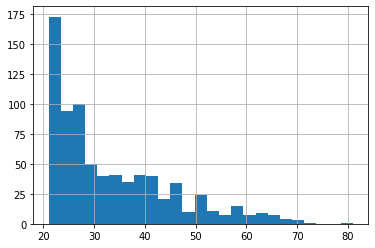

In [18]:
data.age.hist(bins=25)

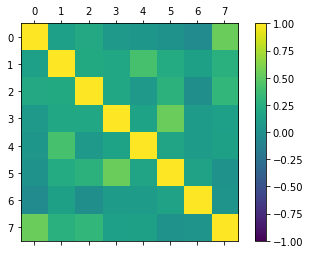

In [19]:
correlations = data.drop('class',axis=1).corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
plt.show()

In [20]:
correlations.iloc[0,7]

0.5443412284023388

In [21]:
correlations.iloc[3,5]

0.5423977271776976

### Scaling the numerical attributes

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['preg','plas','pres','skin','test','mass','age']] \
        = scaler.fit_transform(data[['preg','plas','pres','skin','test','mass','age']])
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.627,1.425995,1
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,0.351,-0.190672,0
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.672,-0.105584,1
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,0.167,-1.041549,0
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,2.288,-0.020496,1


### Checking for imbalanced dataset

In [23]:
data['class'].value_counts()

0    500
1    268
Name: class, dtype: int64

### Splitting the train and test sets

In [24]:
X = data.drop('class', axis=1)
y = data['class']

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [26]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(614, 8) (154, 8) (614,) (154,)


# Data Modelling: Random Forest

### Training the model

In [27]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(class_weight='balanced', random_state = 2)
rfc.fit(X_train, y_train)

C:\Software\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=2,
            verbose=0, warm_start=False)

### Testing the model

In [28]:
y_pred = rfc.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

cnf_mt = confusion_matrix(y_pred, y_test)
acc = accuracy_score(y_pred, y_test)
roc_auc = roc_auc_score(y_test, y_pred)
print('Confusion Matrix:\n',cnf_mt,'\nAccuracy: ',100*acc,'\nArea under ROC curve: ',roc_auc)

Confusion Matrix:
 [[91 19]
 [ 8 36]] 
Accuracy:  82.46753246753246 
Area under ROC curve:  0.7868686868686868


### Tuning the model

In [30]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [5,10,20,30], \
          'max_depth': [5,10], \
          'max_features': [3,5,8]}

grid_search = GridSearchCV(estimator=rfc, param_grid=params, scoring='roc_auc')
grid_search.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=2,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5, 10, 20, 30], 'max_depth': [5, 10], 'max_features': [3, 5, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [31]:
print(grid_search.best_params_, '\n', grid_search.best_score_)

{'max_depth': 5, 'max_features': 3, 'n_estimators': 30} 
 0.8279276025641916


In [32]:
params = {'n_estimators': [25,30,40,50], \
          'max_depth': [3,5,7], \
          'max_features': [2,3,4]}

grid_search = GridSearchCV(estimator=rfc, param_grid=params, scoring='roc_auc')
grid_search.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=2,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [25, 30, 40, 50], 'max_depth': [3, 5, 7], 'max_features': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [33]:
print(grid_search.best_params_, '\n', grid_search.best_score_)

{'max_depth': 3, 'max_features': 3, 'n_estimators': 40} 
 0.8349613115824404


In [34]:
params = {'n_estimators': [35,40,45], \
          'max_depth': [3], \
          'max_features': [3]}

grid_search = GridSearchCV(estimator=rfc, param_grid=params, scoring='roc_auc')
grid_search.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=2,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [35, 40, 45], 'max_depth': [3], 'max_features': [3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [35]:
print(grid_search.best_params_, '\n', grid_search.best_score_)

{'max_depth': 3, 'max_features': 3, 'n_estimators': 40} 
 0.8349613115824404


### Final model

In [36]:
rfc = RandomForestClassifier(n_estimators=40, max_depth=3, max_features=3, class_weight='balanced', random_state = 3)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=3, max_features=3,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=40, n_jobs=1, oob_score=False, random_state=3,
            verbose=0, warm_start=False)

In [37]:
y_pred = rfc.predict(X_test)

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

cnf_mt = confusion_matrix(y_pred, y_test)
acc = accuracy_score(y_pred, y_test)
roc_auc = roc_auc_score(y_test, y_pred)
print('Confusion Matrix:\n',cnf_mt,'\nAccuracy: ',100*acc,'\nArea under ROC curve: ',roc_auc)

Confusion Matrix:
 [[75  8]
 [24 47]] 
Accuracy:  79.22077922077922 
Area under ROC curve:  0.806060606060606
